In [99]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image
import matplotlib.cm as cm 
import scipy
import cmath

<font size="5">**Punto 1**.</font>


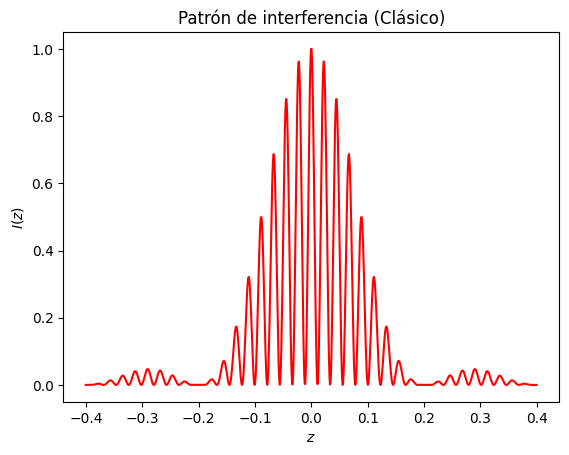

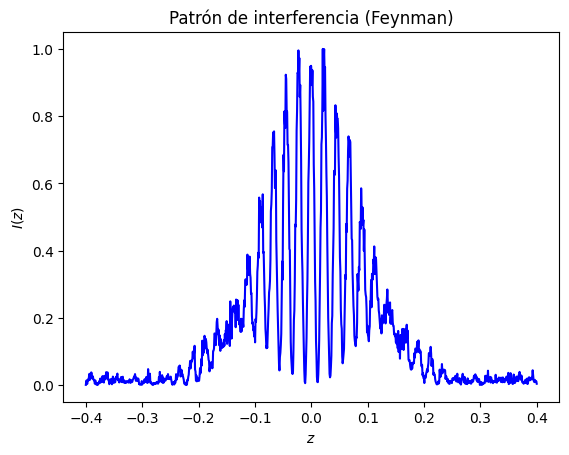

In [100]:
A = 0.1 #cm
long_onda = 670e-7 #cm
D1 = 30 #cm
D2 = 30 #cm
a = 0.01 #cm
d = 0.09 #cm
signo = np.array([-1,1])
N = 10000

def intensities_classical(z):
    theta = np.arctan2(z,D2)
    term1 = (np.cos((np.pi*d/long_onda)*np.sin(theta)))**2
    term2 = (np.sinc((a/long_onda)*np.sin(theta)))**2
    return term1*term2

def intensities_feynman(x,y,z):
    term1 = np.exp(2j * np.pi / long_onda * (D1 + D2))
    term2 = np.exp(np.pi * 1j / (long_onda * D1) * (x - y*np.random.choice(signo, N))**2)
    term3 = np.exp(np.pi * 1j / (long_onda * D1) * (z - y*np.random.choice(signo, N))**2)
    return np.mean(term1 * term2 * term3)

z = np.linspace(-0.4, 0.4, 1000)

p1 = np.zeros(len(z))
p2 = np.zeros(len(z))

for i in range(len(z)):
    x = np.random.uniform(-A/2, A/2, size=N)
    y = np.random.uniform(d/2-a/2, d/2+a/2, size=N)
    p1[i] = intensities_classical(z[i])
    p2[i] = np.absolute(intensities_feynman(x,y,z[i]))**2
    
p1 = p1/p1[np.argmax(p1)]
p2 = p2/p2[np.argmax(p2)]
plt.plot(z, p1, c="r")
plt.title("Patrón de interferencia (Clásico)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
plt.plot(z, p2, c="b")
plt.title("Patrón de interferencia (Feynman)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
#Falta el bono

Interpretar resultados #1

<font size="5">**Punto 2**.</font>

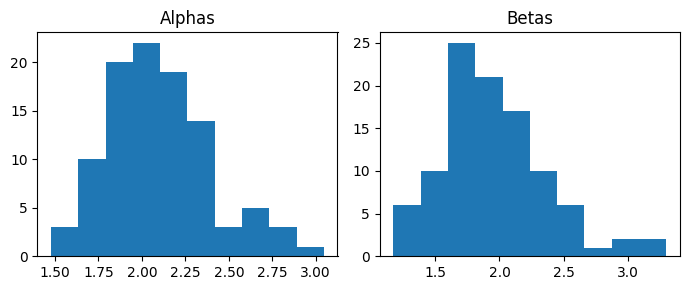

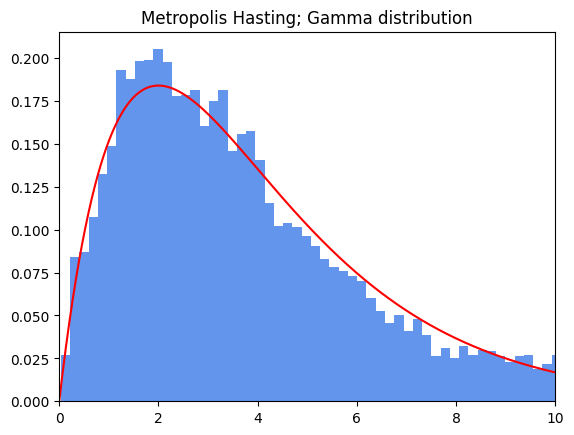

In [101]:
N = 10000
alpha = 2
beta = 2

#Listas
rang = np.linspace(0,10,N)
stats = np.zeros(N)
for n in range(N):
    stats[n] = scipy.stats.gamma(alpha,scale=beta).pdf(rang[n])

#Gamma
def gamma(x,alpha,beta):
    return x**(alpha-1)*np.exp(-x/beta)

#Metrópolis
def metropolis():
    muestras = np.zeros(N)
    x0 = 0.1
    fx0 = gamma(x0,alpha,beta)
    for i in range(N):
        nw_x = x0 + np.random.normal(0, 0.5)
        nw_fx = gamma(nw_x,alpha,beta)    
        accept = nw_fx/fx0
        u = np.random.rand()
        if u <= accept:
            muestras[i] = nw_x
            x0 = nw_x
            fx0 = nw_fx
        else:
            muestras[i] = x0
    return muestras

many_alphas = np.zeros(100)
many_betas = np.zeros(100)
for k in range(100):
    muestras = metropolis()
    jajaj = scipy.stats.gamma.fit(muestras)
    many_alphas[k] = jajaj[0]
    many_betas[k] = jajaj[2] 
    plt.close()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))
ax1.hist(many_alphas)
ax1.set_title("Alphas")
ax2.hist(many_betas)
ax2.set_title("Betas")
plt.tight_layout()
plt.show()
plt.close()
plt.figure()
plt.title("Metropolis Hasting; Gamma distribution")
plt.hist(muestras, density=True, bins=100, color="cornflowerblue")
plt.plot(rang, stats, c="r")
plt.xlim(left=0,right=10)
plt.show()

#Falta Responder preguntas

<font size="5">**Punto 3**.</font>

In [106]:
#Parámtros
N = 150
J = 0.2
beta = 10

#Energia
def energy_cross(matriz, i, j):
    e = 0
    for h in range(-1,2):  
        e += matriz[(i+h)%N,j]*matriz[(i+1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j+1)%N] + matriz[(i+h)%N,j]*matriz[(i-1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j-1)%N]
    for p in range(-1,2):
        e += matriz[i,(j+p)%N]*matriz[(i+1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j+1+p)%N] + matriz[i,(j+p)%N]*matriz[(i-1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j-1+p)%N]
    return e

matriz = np.random.choice([-1, 1], size=(N, N))
matrices = []
contador = 1
for k in range(400000):
    if k%500 == 0:
        plt.imshow(matriz)
        nombre_archivo = f"frames/{contador+1:03}.png"  
        plt.savefig(nombre_archivo) 
        plt.close() 
        contador+=1   
    rand_index = tuple(np.random.randint(0,N,size=2))
    E0 = energy_cross(matriz, rand_index[0], rand_index[1])
    matriz[rand_index] = matriz[rand_index]*-1  
    E1 = energy_cross(matriz, rand_index[0], rand_index[1])
    diff = -J*(E1-E0)
    if diff > 0:
        u = np.random.rand()
        if u > np.exp(-beta*diff):
            matriz[rand_index] = matriz[rand_index]*-1

# Consola: ffmpeg -framerate 60 -i frames/%03d.png -c:v libx264 -pix_fmt yuv420p video.mp4

In [107]:
Video("video.mp4")

<font size="5">**Punto 4**.</font>

In [37]:
# Leer el archivo de texto de Proyecto Gutenberg
with open('larepublica.txt', 'r', encoding='utf-8') as file:
    s = file.read()

# Limpiar el texto eliminando saltos de línea y caracteres especiales
#s = s.replace("\r\n", "\n").replace("\n\n", "#").replace("\n", " ").replace("#", "\n")


# Eliminar caracteres especiales no deseados (ej: tildes, comillas, guiones bajos)
import re
s = re.sub(r"\n{3,}","#",s)
s = re.sub(r"\n","",s)
s = s.replace("#","\n")
#s = re.sub(r'[^\w\s]', '', s)  # Eliminar puntuación, conservando solo caracteres alfanuméricos y espacios

# Convertir todo el texto a minúsculas
s = s.lower()

# Opcionalmente, eliminar la primera y última parte del libro (metadatos)
inicio_idx = s.find("i went down yesterday")
fin_idx = s.find(" end of the project gutenberg ebook the republic ")

if inicio_idx != -1 and fin_idx != -1:
    s = s[inicio_idx:fin_idx]

# Guardar el texto limpio en una variable
texto_limpio = s

In [40]:
import numpy as np

In [41]:
np.unique(list(texto_limpio))

array(['\n', ' ', '!', '(', ')', '*', '+', ',', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'a',
       'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—',
       '‘', '’'], dtype='<U1')